<a href="https://colab.research.google.com/github/rohithp29/Data-Science-Project/blob/main/Task_5i)_Student_Pass_Fail_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Students Pass Fail Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
np.random.seed(42)
num_students = 40000

In [3]:
data = {'Study Hours': np.random.randint(0, 41, num_students),
      'Attendance': np.random.randint(50, 101, num_students)}
data['Pass'] = np.where((data['Study Hours'] > 10) & (data['Attendance'] > 75), 1, 0)

In [4]:
df = pd.DataFrame(data)
df.to_csv("student_pass_fail.csv", index=False)

In [5]:
print(df.head())

   Study Hours  Attendance  Pass
0           38          86     1
1           28          78     1
2           14          91     1
3            7          67     0
4           20          52     0


In [6]:
df.isnull().sum()

,0
Study Hours,0
Attendance,0
Pass,0


In [7]:
df.describe()

,Study Hours,Attendance,Pass
count,40000.000000,40000.000000,40000.000000
mean,19.996075,75.023825,0.360100
std,11.775028,14.667349,0.480035
min,0.000000,50.000000,0.000000
25%,10.000000,62.000000,0.000000
50%,20.000000,75.000000,0.000000
75%,30.000000,88.000000,1.000000
max,40.000000,100.000000,1.000000


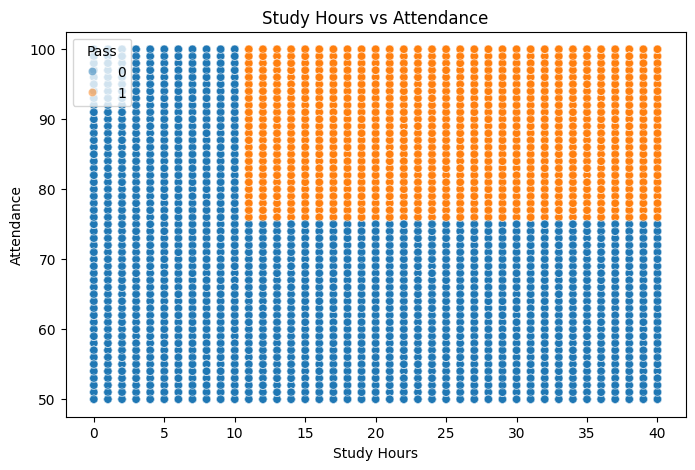

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Study Hours'], y=df['Attendance'], hue=df['Pass'], alpha=0.5)
plt.title("Study Hours vs Attendance")
plt.show()

In [9]:
X = df[['Study Hours', 'Attendance']]
y = df['Pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Model Accuracy: 0.88
Confusion Matrix:
 [[4691  466]
 [ 508 2335]]
